Title for the Project:

# FACT FILTER USING NLP

Submitted by Md Sk Sahidulla (231160005)

In [39]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

# Data Loading and Exploring

In [2]:
df_true=pd.read_csv("True.csv")                  #importing true dataset
print(f"shape of True dataset: {df_true.shape}")
df_true.head()

shape of True dataset: (21417, 4)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
df_true["news_type"]="true"  #creating new column and labelling the data set as "true"
df_true.head()

,title,text,subject,date,news_type
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [4]:
df_fake=pd.read_csv("Fake.csv")                 #importing fake dataset
print(f"shape of fake dataset: {df_fake.shape}")
df_fake.head()

shape of fake dataset: (23481, 4)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
df_fake["news_type"]="fake"   #creating new column and labelling the data set as "fake"
df_fake.head()

,title,text,subject,date,news_type
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [6]:
df_merged=pd.concat([df_true,df_fake],axis=0,ignore_index=True) #merging two dataset
print(f"shape of merged dataset: {df_merged.shape}")
df_merged

shape of merged dataset: (44898, 5)


,title,text,subject,date,news_type
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",fake
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",fake
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",fake
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",fake


In [7]:
df_merged["news_type_label"]=df_merged["news_type"].map({
    "true":0,
    "fake":1
})                                        #create new column and true labelling as 0 and fake as 1
df_merged                

,title,text,subject,date,news_type,news_type_label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true,0
...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",fake,1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",fake,1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",fake,1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",fake,1


In [8]:
def nan_check(col):                                   #a function for checking nan value in column
    nan_df=df_merged[col][df_merged[col]==np.nan]
    print(f"no of missing values in {col}: {nan_df.shape[0]} ")
    return

In [9]:
# checking nan value in every column

nan_check("text")
nan_check("title")
nan_check("subject")
nan_check("date")

no of missing values in text: 0 
no of missing values in title: 0 
no of missing values in subject: 0 
no of missing values in date: 0 


In [10]:
df=df_merged.sample(frac=1).reset_index(drop=True)  #shuffling the rows 

In [11]:
df.head()

,title,text,subject,date,news_type,news_type_label
0,Trump seeks to clarify comments on guns at Orl...,(Reuters) - Republican U.S. presidential candi...,politicsNews,"June 20, 2016",true,0
1,Harris Corp wins $1.7 billion U.S. defense con...,WASHINGTON (Reuters) - Harris Corp was awarded...,politicsNews,"June 22, 2016",true,0
2,Trump Tweets Lie About America’s Third Bigges...,Donald Trump has been tweeting all day and h...,News,"June 22, 2017",fake,1
3,Odebrecht paid firms linked to Peru's Kuczynsk...,LIMA (Reuters) - Brazilian builder Odebrecht t...,worldnews,"December 14, 2017",true,0
4,WHAT OSCARS? “CONGRATULATIONS MELANIA!”…PRESID...,"As Hollywood had its big night at The Oscars, ...",politics,"Feb 26, 2017",fake,1


# Data Preprocessing

In [12]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [13]:
def reg(text):
    pattern=r"[^\w\s]"
    processed=re.sub(pattern,'',text)  #removing the punctuations using regex
    return processed

reg_text=df.text.apply(reg)

In [14]:
reg_text[0]

'Reuters  Republican US presidential candidate Donald Trump said he was referring to security staff but not patrons in comments that if more people had been armed during a Florida nightclub shooting last week fewer would have died When I said that if within the Orlando club you had some people with guns I was obviously talking about additional guards or employees Trump said on Twitter on Monday Trump had said last week that he wished someone inside the Pulse nightclub in Orlando on June 12 was carrying a firearm to stop a gunman before he could kill more clubgoers  If the bullets were going in the other direction aimed at this guy who was just open target practice you would have had a situation that was always horrible but nothing like the carnage that we all as a people suffered this weekend Trump said on Wednesday at a rally in Atlanta National Rifle Association President Wayne LaPierre on Sunday appeared critical of the idea of having clubgoers armed I dont think you should have fir

In [15]:
def preprocessed_text(datf):
    datf=datf.apply(lambda x: x.lower() if isinstance(x, str) else x) # making all the words in lower case
    datf=datf.apply(word_tokenize)        # tokenization using nltk
    stop_word=stopwords.words("english")  # storing all the stopwords
    datf=datf.apply(lambda x:[i for i in x if i not in stop_word])  #removing the stopwords
    stemr=PorterStemmer()
    datf=datf.apply(lambda x: [stemr.stem(i) for i in x])  # stemming using Porterstemmer

    datf=datf.apply(lambda x: " ".join(x))  # after all the preprocessing task putting it as string
    return datf

In [16]:
df["processed_text"]=preprocessed_text(reg_text)

In [17]:
df.processed_text[0]

'reuter republican us presidenti candid donald trump said refer secur staff patron comment peopl arm florida nightclub shoot last week fewer would die said within orlando club peopl gun obvious talk addit guard employe trump said twitter monday trump said last week wish someon insid puls nightclub orlando june 12 carri firearm stop gunman could kill clubgoer bullet go direct aim guy open target practic would situat alway horribl noth like carnag peopl suffer weekend trump said wednesday ralli atlanta nation rifl associ presid wayn lapierr sunday appear critic idea clubgoer arm dont think firearm peopl drink lapierr said cbss face nation offduti orlando polic offic work secur club shoot occur author said'

In [18]:
df.head()

,title,text,subject,date,news_type,news_type_label,processed_text
0,Trump seeks to clarify comments on guns at Orl...,(Reuters) - Republican U.S. presidential candi...,politicsNews,"June 20, 2016",true,0,reuter republican us presidenti candid donald ...
1,Harris Corp wins $1.7 billion U.S. defense con...,WASHINGTON (Reuters) - Harris Corp was awarded...,politicsNews,"June 22, 2016",true,0,washington reuter harri corp award 17 billion ...
2,Trump Tweets Lie About America’s Third Bigges...,Donald Trump has been tweeting all day and h...,News,"June 22, 2017",fake,1,donald trump tweet day latest trigger needless...
3,Odebrecht paid firms linked to Peru's Kuczynsk...,LIMA (Reuters) - Brazilian builder Odebrecht t...,worldnews,"December 14, 2017",true,0,lima reuter brazilian builder odebrecht transf...
4,WHAT OSCARS? “CONGRATULATIONS MELANIA!”…PRESID...,"As Hollywood had its big night at The Oscars, ...",politics,"Feb 26, 2017",fake,1,hollywood big night oscar donald melania trump...


In [19]:
X=df["processed_text"]     #here X as feature
y=df["news_type_label"]    # y as target
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(X, y, test_size=0.2,random_state=42) # splitting into train and test datasets

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
X_train_tfidf=tfidf.fit_transform(X_train)
X_test_tfidf=tfidf.transform(X_test)

# Model Training

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,jaccard_score,f1_score,confusion_matrix,ConfusionMatrixDisplay

In [23]:
def default_model_pred(model):
    model.fit(X_train_tfidf ,y_train)   # training the datasets
    y_pred=model.predict(X_test_tfidf) # prediction of the test data set
    print("Accuracy on test set: {:.2f}".format(accuracy_score(y_test, y_pred)))  #finding accuracy score
    print("Classification report:\n",classification_report(y_test,y_pred)) # showing the classification report

In [24]:
# logistic regression
default_model_pred(LogisticRegression())

Accuracy on test set: 0.98
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      4309
           1       0.99      0.98      0.99      4671

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



In [25]:
# random forest
default_model_pred(RandomForestClassifier())

Accuracy on test set: 0.99
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4309
           1       0.99      0.99      0.99      4671

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [26]:
# decision tree
default_model_pred(DecisionTreeClassifier())

Accuracy on test set: 1.00
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4309
           1       1.00      1.00      1.00      4671

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [27]:
# gradient boosting
default_model_pred(GradientBoostingClassifier())

Accuracy on test set: 0.99
Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4309
           1       1.00      0.99      1.00      4671

    accuracy                           0.99      8980
   macro avg       0.99      1.00      0.99      8980
weighted avg       0.99      0.99      0.99      8980



# Hyperparameter Tuning

In [28]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

Here HalvingGridSearchCV is used for hyperparameter tuning to make the process fast.
"n_jobs=-1" is used to use all available CPU cores.

In every case, I took just one parameter for hyperparameter tuning to run it fast. I might get better result if I used more than one parameter. 

In [29]:
#hyperparameter tuning for logistic regression model

parameters={
    'C': [0.1, 1, 10, 100]   # Inverse of regularization strength
}
gs_cv_log=HalvingGridSearchCV(LogisticRegression(max_iter=1000),param_grid=parameters,cv=5, scoring='accuracy')
gs_cv_log.fit(X_train_tfidf,y_train)
print(f"Best parameters for logistic regression are: {gs_cv_log.best_params_}")
print(f"Best score for logistic regression is: {gs_cv_log.best_score_}")

Best parameters for logistic regression are: {'C': 100}
Best score for logistic regression is: 0.9934285301013761


In [30]:
#hyperparameter tuning for Random forest model

parameters={
    'n_estimators': [100, 200, 300]      # Number of trees in the forest
}
gs_cv_ran=HalvingGridSearchCV(RandomForestClassifier(random_state=42),param_grid=parameters,cv=5, scoring='accuracy',n_jobs=-1)
gs_cv_ran.fit(X_train_tfidf,y_train)
print(f"Best parameters for Random Forest model are: {gs_cv_ran.best_params_}")
print(f"Best score for Random Forest model is: {gs_cv_ran.best_score_}")

Best parameters for Random Forest model are: {'n_estimators': 300}
Best score for Random Forest model is: 0.9868571493702467


In [31]:
#hyperparameter tuning for Decision Tree classifier

parameters={
    'criterion': ['gini', 'entropy']      # Split criterion
}
gs_cv_dt=HalvingGridSearchCV(DecisionTreeClassifier(random_state=42),param_grid=parameters,cv=5, scoring='accuracy',n_jobs=-1)
gs_cv_dt.fit(X_train_tfidf,y_train)
print(f"Best parameters for Decision Tree classifier are: {gs_cv_dt.best_params_}")
print(f"Best score for Decision Tree classifier is: {gs_cv_dt.best_score_}")

Best parameters for Decision Tree classifier are: {'criterion': 'entropy'}
Best score for Decision Tree classifier is: 0.9955174995589375


In [32]:
#hyperparameter tuning for Gradient boosting

parameters={
    'n_estimators': [50, 100, 200]          # Number of boosting stages (trees)
}
gs_cv_gb=HalvingGridSearchCV(GradientBoostingClassifier(random_state=42),param_grid=parameters,cv=5, scoring='accuracy',n_jobs=-1)
gs_cv_gb.fit(X_train_tfidf,y_train)
print(f"Best parameters for Gradient boosting are: {gs_cv_gb.best_params_}")
print(f"Best score for Gradient boosting is: {gs_cv_gb.best_score_}")

Best parameters for Gradient boosting are: {'n_estimators': 200}
Best score for Gradient boosting is: 0.9950156804916215


# Model Evaluation
On the basis of best model from Hyperparameter tuning

In [47]:
# creating function for model evaluation
def model_evaluation(gs_cv,model):
    best_model=gs_cv.best_estimator_                      #choosing the best model from hyperparameter tuning
    y_pred = best_model.predict(X_test_tfidf)             #predicting on test dataset
    acc_score=accuracy_score(y_test, y_pred)
    jac_index=jaccard_score(y_test, y_pred)
    f1_sc=f1_score(y_test, y_pred)
    print(f"Classification Report for {model}:\n{classification_report(y_test, y_pred)}")                    #showing classification report
    cm = confusion_matrix(y_test, y_pred)

    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion matrix for {model}")
    plt.xticks(ticks=[0,1],labels=["True","Fake"])
    plt.yticks(ticks=[0,1],labels=["True","Fake"])
    return f"{acc_score :.2f}",f"{jac_index :.2f}",f"{f1_sc :.2f}"

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4309
           1       1.00      1.00      1.00      4671

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



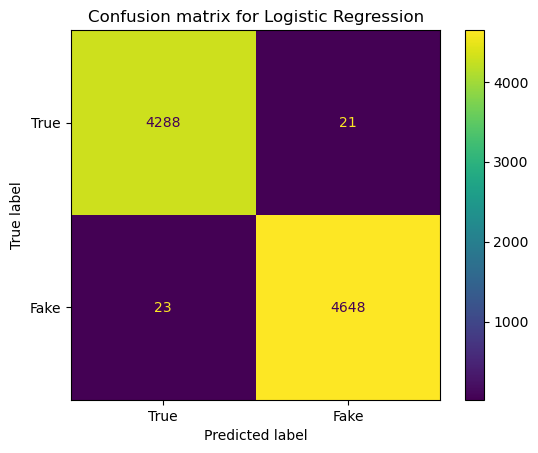

In [48]:
# model evaluation for logistic regression
acc_sc_log,jac_index_log,f1_sc_log=model_evaluation(gs_cv_log,"Logistic Regression")

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4309
           1       0.99      0.99      0.99      4671

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



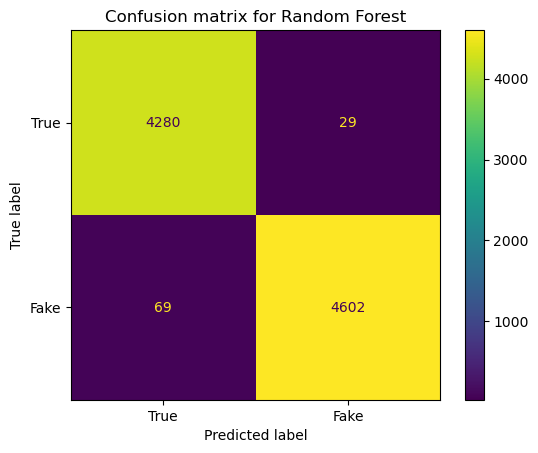

In [49]:
# model evaluation for Random forest
acc_sc_ran,jac_index_ran,f1_sc_ran=model_evaluation(gs_cv_ran,"Random Forest")

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4309
           1       0.99      1.00      1.00      4671

    accuracy                           0.99      8980
   macro avg       1.00      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



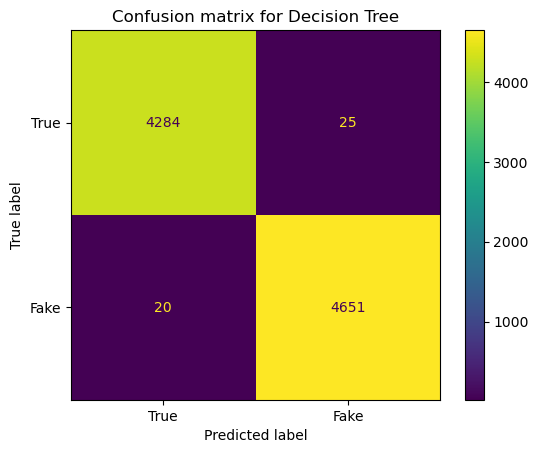

In [50]:
# model evaluation for decision tree
acc_sc_dt,jac_index_dt,f1_sc_dt=model_evaluation(gs_cv_dt,"Decision Tree")

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4309
           1       1.00      0.99      1.00      4671

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



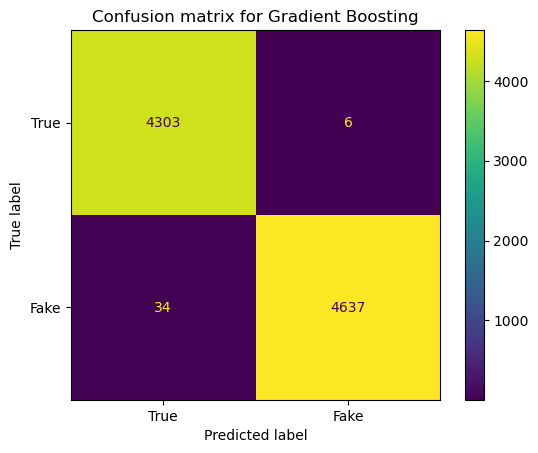

In [51]:
# model evaluation for gradient boosting
acc_sc_gb,jac_index_gb,f1_sc_gb=model_evaluation(gs_cv_gb,"Gradient Boosting")

In [52]:
Report=pd.DataFrame({
    "models":["logistic regression","Random forest","Decision Tree","Gradient boosting"],
    "Accuracy score":[acc_sc_log,acc_sc_ran,acc_sc_dt,acc_sc_gb],
    "Jaccard Index":[jac_index_log,jac_index_ran,jac_index_dt,jac_index_gb],
    "f1-score":[f1_sc_log,f1_sc_ran,f1_sc_dt,f1_sc_gb]
})
Report

,models,Accuracy score,Jaccard Index,f1-score
0,logistic regression,1.00,0.99,1.00
1,Random forest,0.99,0.98,0.99
2,Decision Tree,0.99,0.99,1.00
3,Gradient boosting,1.00,0.99,1.00


# Comparing the performances

We can see logistic regression and Random forest work better when I do hyperparameter tuning. But for the case of Decision Tree and Gradient boosting, the results are same.

Among all these models, Decision tree works very well. Gradient boosting also very good.Logistic regression and Random forest relatively a little bad than the two mentioned models.